# PERFORM WEB SCRAPING ON BOOK STORE http://books.toscrape.com/
The objective of this project is to use web scraping for extracting data from a website and perform some analysis on scrapped data.


We will scrape
- Pages
- Prices
- Ratings
- Titles
- URLs(Images)

and create a *Pandas DataFrame*, perform some data cleaning and finally make conclusions about the data.

### Initial observations about website data *(http://books.toscrape.com/)*
1. Every book consists of related data like *rating, title, price and in/out stock*
2. Books are loaded as a pagination.
    - Pagination url is in the form of *http://books.toscrape.com/catalogue/page-1.html*
    - ***.../page-1.html*** - first page, ***.../page-2.html*** - second page, and so on and so forth
3. Each book as an image of it's cover page.

### Libraries used:
- Requests
- BeautifulSoap
- Pandas

In [197]:
# import required libraries

import requests
import bs4
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
# initialize lists and other variables for scraping process
pages = []
prices = []
ratings = []
titles = []
urls = []

base_url = 'http://books.toscrape.com/'

#### We have to deal with paginated content here...
That means, the complete list of books is not available as a single html page. Therefore we have to find
1. How many pagination pages are available?
2. and then loop through every page and scrape data from them

In [119]:
# number of pages to be selected.
no_of_pages = 0

# srape base url content
base_request = requests.get(base_url)
print('Status code: ', base_request.status_code)

base_content = bs4.BeautifulSoup(base_request.text, 'xml')
pagination_info = base_content.select('ul.pager > li.current')
no_of_pages = int(pagination_info[0].text.strip().split(' ').pop())
print('There are %d pages in the pagination.' % no_of_pages)

Status code:  200
There are 50 pages in the pagination.


In [120]:
# loop through pagination pages and get page content using Requests library
pages = []
for page in range(1, no_of_pages + 1):
    url = (base_url + 'catalogue/page-{}.html'.format(page))
    pages.append(url)
    
pages

['http://books.toscrape.com/catalogue/page-1.html',
 'http://books.toscrape.com/catalogue/page-2.html',
 'http://books.toscrape.com/catalogue/page-3.html',
 'http://books.toscrape.com/catalogue/page-4.html',
 'http://books.toscrape.com/catalogue/page-5.html',
 'http://books.toscrape.com/catalogue/page-6.html',
 'http://books.toscrape.com/catalogue/page-7.html',
 'http://books.toscrape.com/catalogue/page-8.html',
 'http://books.toscrape.com/catalogue/page-9.html',
 'http://books.toscrape.com/catalogue/page-10.html',
 'http://books.toscrape.com/catalogue/page-11.html',
 'http://books.toscrape.com/catalogue/page-12.html',
 'http://books.toscrape.com/catalogue/page-13.html',
 'http://books.toscrape.com/catalogue/page-14.html',
 'http://books.toscrape.com/catalogue/page-15.html',
 'http://books.toscrape.com/catalogue/page-16.html',
 'http://books.toscrape.com/catalogue/page-17.html',
 'http://books.toscrape.com/catalogue/page-18.html',
 'http://books.toscrape.com/catalogue/page-19.html',
 '

### Store soup objects for each page in a list

In [121]:
soup_objs = []

for page_url in pages:
    page = requests.get(page_url)
    soup_objs.append(bs4.BeautifulSoup(page.text, 'html.parser'))

In [162]:
titles_temp = []
ratings_temp = []
prices_temp = []
urls_temp = []

for soup_obj in soup_objs:
    titles_temp.append(soup_obj.find_all('h3'))
    ratings_temp.append(soup_obj.find_all('p', 'star-rating'))
    prices_temp.append(soup_obj.find_all('p', 'price_color'))
    urls_temp.append(soup_obj.select('article.product_pod > div > a > img.thumbnail'))

#urls_temp

### Collect the Titles

In [178]:
titles = []

for book_titles in titles_temp:
    for book_title in book_titles:
        title_text = book_title.getText()
        titles.append(title_text)
    
len(titles)

1000

### Collect the Ratings

In [180]:
ratings = []
for page_ratings in ratings_temp:
    #print(page_ratings)
    for rating in page_ratings:
        if len(rating['class']) > 1:
            rating_val = rating['class'][1]
            #print(rating_val)
            ratings.append(rating_val)
        
len(ratings)

1000

### Collect Prices

In [183]:
prices = []
for page_prices in prices_temp:
    for price in page_prices:
        #print(price.text)
        # remove the special charactor and Pound sign from the price
        prices.append(float(price.text.replace('Â£','')))
        
len(prices)

1000

### Collect all image URLs of cover pages

In [184]:
urls = []
for page_imgs in urls_temp:
    for img in page_imgs:
        #print(img['src'])
        urls.append(base_url + img['src'].replace('..', ''))
        
len(urls)

1000

# Data processing on scraped data
We will create a *Pandas DataFrame* with all the data we scraped from the website.

In [186]:
# create a dictionary for data we collected

data_dict = {
    'Title': titles,
    'Price': prices,
    'Rating': ratings,
    'URL': urls
}

# create the DataFrame

books_df = pd.DataFrame(data_dict)
books_df.head()

,Title,Price,Rating,URL
0,A Light in the ...,51.77,Three,http://books.toscrape.com//media/cache/2c/da/2...
1,Tipping the Velvet,53.74,One,http://books.toscrape.com//media/cache/26/0c/2...
2,Soumission,50.10,One,http://books.toscrape.com//media/cache/3e/ef/3...
3,Sharp Objects,47.82,Four,http://books.toscrape.com//media/cache/32/51/3...
4,Sapiens: A Brief History ...,54.23,Five,http://books.toscrape.com//media/cache/be/a5/b...


In [187]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   1000 non-null   object 
 1   Price   1000 non-null   float64
 2   Rating  1000 non-null   object 
 3   URL     1000 non-null   object 
dtypes: float64(1), object(3)
memory usage: 31.4+ KB


### Sort dataset by price to find the larest price

In [188]:
books_df.sort_values(by='Price', ascending=False)

,Title,Price,Rating,URL
648,The Perfect Play (Play ...,59.99,Three,http://books.toscrape.com//media/cache/40/16/4...
617,Last One Home (New ...,59.98,Three,http://books.toscrape.com//media/cache/e4/0a/e...
860,Civilization and Its Discontents,59.95,Two,http://books.toscrape.com//media/cache/4d/a6/4...
560,The Barefoot Contessa Cookbook,59.92,Five,http://books.toscrape.com//media/cache/dd/07/d...
366,The Diary of a ...,59.90,Three,http://books.toscrape.com//media/cache/83/d5/8...
...,...,...,...,...
302,Greek Mythic History,10.23,Five,http://books.toscrape.com//media/cache/36/cf/3...
84,Patience,10.16,Three,http://books.toscrape.com//media/cache/01/72/0...
716,The Tipping Point: How ...,10.02,Two,http://books.toscrape.com//media/cache/27/3d/2...
501,The Origin of Species,10.01,Four,http://books.toscrape.com//media/cache/da/0d/d...


### Replace Rating strings to integer

In [189]:
books_df['Rating'].value_counts()

One      226
Three    203
Five     196
Two      196
Four     179
Name: Rating, dtype: int64

In [190]:
map_ratings = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}

books_df['Rating'] = books_df['Rating'].replace(map_ratings)

In [193]:
books_df.head()

,Title,Price,Rating,URL
0,A Light in the ...,51.77,3,http://books.toscrape.com//media/cache/2c/da/2...
1,Tipping the Velvet,53.74,1,http://books.toscrape.com//media/cache/26/0c/2...
2,Soumission,50.10,1,http://books.toscrape.com//media/cache/3e/ef/3...
3,Sharp Objects,47.82,4,http://books.toscrape.com//media/cache/32/51/3...
4,Sapiens: A Brief History ...,54.23,5,http://books.toscrape.com//media/cache/be/a5/b...


In [194]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   1000 non-null   object 
 1   Price   1000 non-null   float64
 2   Rating  1000 non-null   int64  
 3   URL     1000 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 31.4+ KB


### Check the correlation between *Price* and *Rating*

In [196]:
books_df.corr(numeric_only=True)

,Price,Rating
Price,1.000000,0.028166
Rating,0.028166,1.000000


<Axes: >

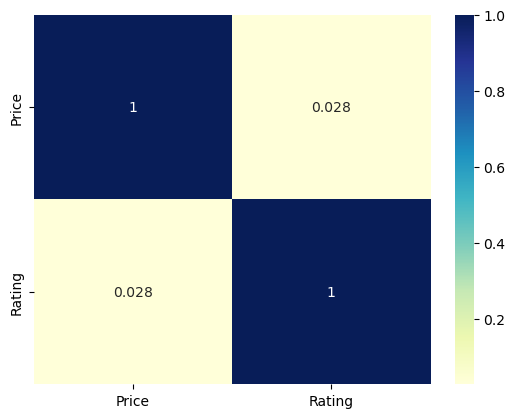

In [201]:
sns.heatmap(books_df.corr(numeric_only=True), annot=True, cmap='YlGnBu')

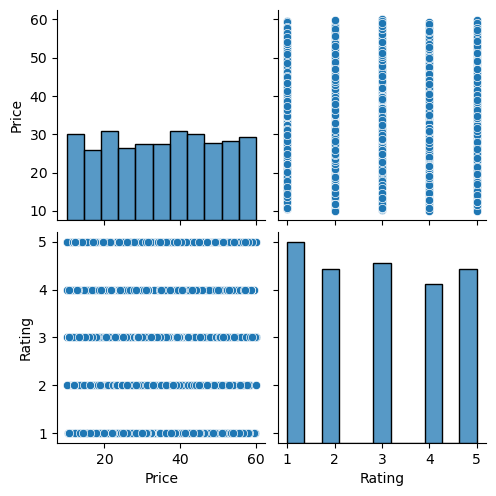

In [202]:
sns.pairplot(books_df)

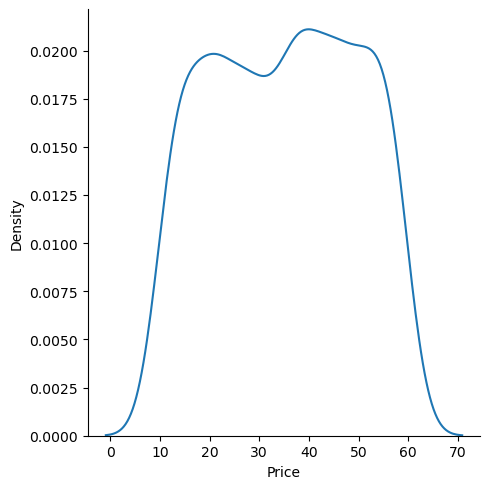

In [208]:
sns.displot(data=books_df['Price'], kind='kde')

### Examine how *Rating* and *Price* are related together

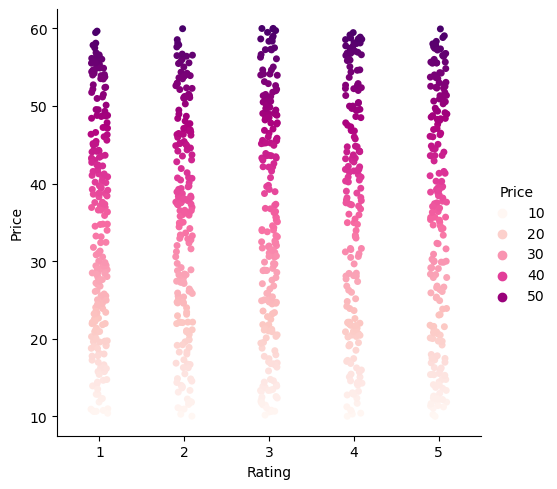

In [261]:
sns.catplot(data=books_df, x='Rating', y='Price', hue='Price', palette='RdPu')
plt.show()

Above `catplot` shows that *Price variation* in different Ratings are almost the same.

### Following statistics also confirms that ***Price*** of the books are not dependent on the ***Ratings***.
Every Rating has an average Price around 34

In [237]:
books_df.groupby(['Rating'], as_index=False).mean(numeric_only=True)

,Rating,Price
0,1,34.561195
1,2,34.810918
2,3,34.692020
3,4,36.093296
4,5,35.374490


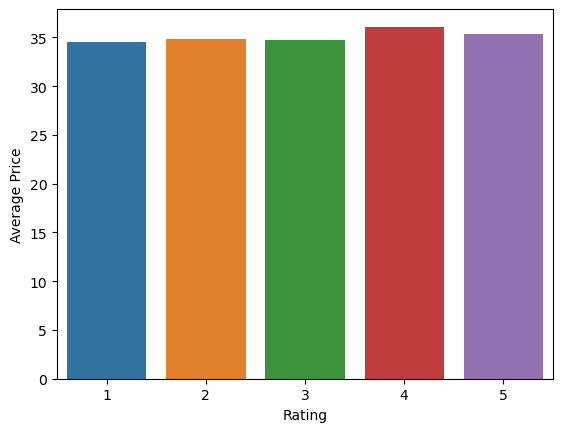

In [242]:
sns.barplot(data=books_df.groupby(['Rating'], as_index=False).mean(numeric_only=True), x='Rating', y='Price')
plt.ylabel('Average Price')
plt.show()

In [260]:
books_df.loc[books_df['Price'] > 30]['Rating'].value_counts()

1    126
3    121
2    120
5    118
4    112
Name: Rating, dtype: int64